**Task 1:** Find a data set which is suitable for regression analysis and consists of at least 6-7 numerical features only. 
Check for possible multicollinearity problems in the data set and remedy this problem if it exists.
Then, apply feature selection algorithms to find the best subset. Explain the reason (give support) why you picked that model as the final one.


## Used Car Data Set Description

This data set contains information about used cars for sale in India. The data set includes the following features:

- `Name` : The brand and model of the car.
- `Location` : The location in which the car is being sold or is available for purchase.
- `Year`: The year or edition of the model.
- `Kilometers_Driven` : The total kilometers driven in the car by the previous owner(s) in KM.
- `Fuel_Type` : The type of fuel used by the car.
- `Transmission` : The type of transmission used by the car.
- `Owner_Type` : Whether the ownership is Firsthand, Second hand or other.
- `Mileage` : The standard mileage offered by the car company in kmpl or km/kg.
- `Engine` : The displacement volume of the engine in cc.
- `Power` : The maximum power of the engine in bhp.
- `Seats` : The number of seats in the car.
- `New_Price` : Price of new model.
- `Price` : The price of the used car in INR Lakhs.$$Lakh = \frac{million}{10}$$


This data set can be used to analyze the pricing trends of used cars in India based on various factors such as location, year, kilometers driven, and other features. Additionally, this data set can be used to build predictive models to estimate the price of used cars based on their characteristics.


In [1]:
# import libraries
import numpy as np
import pandas as pd

# Load Data
car_df = pd.read_csv("datasets/car.csv")
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [2]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


There are `12 columns` in total, with `6019 non-null values` in most columns, except for **Mileage**, **Engine**, **Power**, **Seats**, and **New_Price** columns which have missing values. The data types of columns vary, with object data type being used for columns containing strings or mixed data types, int64 for integer values, and float64 for floating-point values.

The `Price` column is of particular importance as it contains the `target variable` for the analysis. **The goal is to predict the price of the used cars based on the other available features.**

### Creating a subset of the dataset with only numerical features and minimum 6-7 features.
To meet the requirements of the given question, we need to create a subset of the dataset with only numerical features and a minimum of 6-7 features. This involves selecting a subset of the original dataset that satisfies the criteria and then using it for further analysis. By doing so, we can eliminate non-numeric features and focus on the important variables for our analysis.

Also, the units of measurement for features such as `kmpl`, `km/kg`, `CC`, `bhp`, and `Lakh` are not standardized across car manufacturers or models, making it difficult to compare them directly. Removing these units of measurement from the features simplifies the data and makes it easier to work with. We can still use the numerical values associated with these features for analysis and modeling purposes, even without their respective units of measurement. 

In [3]:
# Remove bhp from Power Data Feature.
df_col=pd.DataFrame()
df_col['Power'] = car_df['Power']

pattern = r'([\d\.]+) bhp'
df_col['numeric_value'] = df_col['Power'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
car_df = car_df.drop(columns=["Power"], axis=1)
car_df['Power'] = df_col['numeric_value']

In [4]:
# Remove CC from Engine Data Feature.
df_col=pd.DataFrame()
df_col['Engine'] = car_df['Engine']
pattern = r'([\d\.]+) CC'
df_col['numeric_value'] = df_col['Engine'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
car_df = car_df.drop(columns=["Engine"], axis=1)
car_df['Engine'] = df_col['numeric_value']

In [5]:
# Remove km/kg and kmpl from Mileage Data Feature.
df_col=pd.DataFrame()
df_col['Mileage'] = car_df['Mileage']
pattern = r'([\d\.]+) km'
df_col['numeric_value'] = df_col['Mileage'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
car_df = car_df.drop(columns=["Mileage"], axis=1)
car_df['Mileage'] = df_col['numeric_value']

In [6]:
# Remove Lakh from New_Price Data Feature.
df_col=pd.DataFrame()
df_col['New_Price'] = car_df['New_Price']
pattern = r'([\d\.]+) Lakh'
df_col['numeric_value'] = df_col['New_Price'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
car_df = car_df.drop(columns=["New_Price"], axis=1)
car_df['New_Price'] = df_col['numeric_value']

### Updated Dataset
The current state of the dataset is now the following.

In [7]:
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Power,Engine,Mileage,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,58.16,998.0,26.60,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,126.20,1582.0,19.67,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,88.70,1199.0,18.20,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,88.76,1248.0,20.77,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,140.80,1968.0,15.20,NaN


### Generating a subset of the data that doesn't contain any missing values.

Before proceeding with any data analysis, it's essential to ensure that the dataset is complete and doesn't contain any null or missing values. Null or missing values in a dataset can significantly impact the accuracy of any statistical analysis or machine learning model. Therefore, it's crucial to identify and address these issues early on in the data cleaning process.

To achieve this, one needs to check the dataset for null or missing values. If any null or missing values are found, it's recommended to remove them from the dataset. However, this can depend on the nature and quantity of missing data. `In this particular question`, **it is stated that we don't need to deal with data that has missing values**. Therefore, creating a subset from the current data by dropping the null or missing values is a suitable approach.

By doing so, we can create a new subset of the original dataset that contains only the complete data. This subset can be used for further analysis, and any missing data won't hinder our results. In conclusion, it's crucial to address missing data before performing any statistical analysis or machine learning to ensure accurate and reliable results.

In [8]:
car_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  42
Price                   0
Power                 143
Engine                 36
Mileage                 2
New_Price            5212
dtype: int64

In [9]:
car_df=car_df.dropna()
car_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Power                0
Engine               0
Mileage              0
New_Price            0
dtype: int64

In [10]:
print('New Dataset Shape: ', car_df.shape)

New Dataset Shape:  (806, 13)


In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 2 to 6014
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               806 non-null    object 
 1   Location           806 non-null    object 
 2   Year               806 non-null    int64  
 3   Kilometers_Driven  806 non-null    int64  
 4   Fuel_Type          806 non-null    object 
 5   Transmission       806 non-null    object 
 6   Owner_Type         806 non-null    object 
 7   Seats              806 non-null    float64
 8   Price              806 non-null    float64
 9   Power              806 non-null    float64
 10  Engine             806 non-null    float64
 11  Mileage            806 non-null    float64
 12  New_Price          806 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 88.2+ KB


### Remove categorical columns

**In order to process the data as required by the question**, it is necessary to `exclude the categorical column` from the dataset. Only the numeric columns are relevant for the analysis, and therefore, it is recommended to remove the categorical column from the dataset. By doing so, we can focus our analysis on the relevant numeric data and avoid any potential confusion or errors that may arise from processing the categorical column.

In [12]:
car_df = car_df.drop(columns=['Name', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis=1)
car_df.head()

,Kilometers_Driven,Seats,Price,Power,Engine,Mileage,New_Price
2,46000,5.0,4.50,88.70,1199.0,18.20,8.61
7,36000,8.0,17.50,171.50,2755.0,11.36,21.00
10,25692,5.0,9.95,103.25,1462.0,21.56,10.65
15,110000,7.0,15.00,175.56,2477.0,13.50,32.01
20,32982,5.0,18.55,190.00,1995.0,22.69,47.87


## Splitting Data into Train and Test

To ensure the accuracy and generalizability of a machine learning model, it's important to split the data into training and test sets. The `training set is used to train the model`, while the `test set is used to evaluate the model's performance`. The process of splitting the data involves randomly dividing the dataset into two separate subsets: the training set and the test set. The training set is typically a larger portion of the dataset, while the test set is a smaller portion. The model is trained on the training set, and its performance is evaluated on the test set. This approach helps to `avoid overfitting`, which occurs when a model performs well on the training data but fails to generalize to new data. It's important to note that the data should be split randomly, and the split should be representative of the overall dataset. The common split ratios are `70:30`, `80:20`, or `90:10`, depending on the size of the dataset and the complexity of the model.

**For the given dataset we divide it in the ratio 80:20**.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Split 80:20
train_x, test_x, train_y, test_y = train_test_split(car_df.drop(columns=['Price'], axis=1), car_df[['Price']], test_size=0.2, random_state=1300)

In [14]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(644, 6)
(644, 1)
(162, 6)
(162, 1)


In [15]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 3747 to 1369
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  644 non-null    int64  
 1   Seats              644 non-null    float64
 2   Power              644 non-null    float64
 3   Engine             644 non-null    float64
 4   Mileage            644 non-null    float64
 5   New_Price          644 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 35.2 KB


## Multicollinearity Check

To detect multicollinearity among the features in the property training data, we can compute the sample correlation matrix. This will help us to identify any strong correlations between the features that may indicate multicollinearity..

In [16]:
train_x_corr = train_x.corr().round(4)
train_x_corr

,Kilometers_Driven,Seats,Power,Engine,Mileage,New_Price
Kilometers_Driven,1.0000,0.1982,0.0118,0.1407,0.0424,-0.0017
Seats,0.1982,1.0000,0.1035,0.4399,-0.4112,-0.0335
Power,0.0118,0.1035,1.0000,0.8477,-0.5369,0.8888
Engine,0.1407,0.4399,0.8477,1.0000,-0.6332,0.7071
Mileage,0.0424,-0.4112,-0.5369,-0.6332,1.0000,-0.3572
New_Price,-0.0017,-0.0335,0.8888,0.7071,-0.3572,1.0000


### Generate a visual representation of the data using a heatmap.

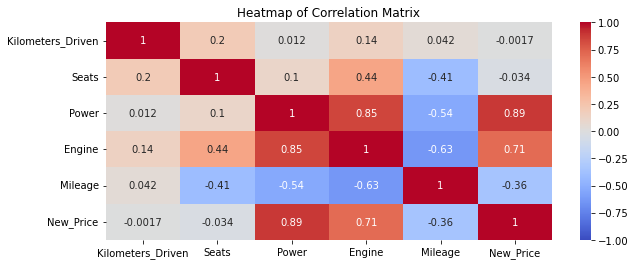

In [17]:
# generate heatmap
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.rcParams['figure.figsize'] = [10, 4]

# generate heatmap

sns.heatmap(train_x_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show();

- The `correlation matrix` shows the strength of relationships between variables.
- The `highest positive correlation` in the matrix is between `Power and Engine (0.8477)`, indicating a strong positive association.
- `Positive correlations` also exist between `Seats and Engine (0.4399)`, and `Kilometers_Driven and Engine (0.1407)`, but these are weaker correlations.
- There are `negative correlations` as well, such as between `Mileage and Seats (-0.4112)`, indicating an inverse relationship.
- Correlations do not necessarily imply causation, and further analysis may be needed to determine the nature of these relationships.
- `New_Price` shows a relatively `strong correlation with Power and Engine`, suggesting that these variables may be important factors in determining the price of a car.

Overall, the heatmap provides a useful visual representation of the correlation matrix and can help identify patterns and trends within the data.

#### **To calculate the variance inflation factor, an intercept with a value of 1 is added to the data.**

Adding an intercept with a value of 1 when calculating the variance inflation factor is important to account for the constant term or the intercept in the linear regression equation. This term represents the value of the dependent variable when all independent variables are zero, and including it ensures that the model includes the intercept term in the regression equation. Without an intercept term, the VIF values may be biased and inaccurate. Therefore, including the intercept term is crucial for accurately calculating the variance inflation factor for each independent variable.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

train_x["intercept"]=1 
vif_df = pd.DataFrame() 
vif_df["feature"] = train_x.columns 
vif_df

,feature
0,Kilometers_Driven
1,Seats
2,Power
3,Engine
4,Mileage
5,New_Price
6,intercept


In [19]:
vif_df["VIF"] = [variance_inflation_factor(train_x.values, i) for i in range(len(train_x.columns))]  #list comprehension 
vif_df.sort_values('VIF', ascending=False, inplace=True) #ignore intercept row  in the below table
print(vif_df)

             feature         VIF
6          intercept  165.728404
2              Power   10.181168
3             Engine    6.850098
5          New_Price    5.421894
1              Seats    1.986607
4            Mileage    1.926204
0  Kilometers_Driven    1.107863


To prepare the data for regression analysis, it is recommended to `exclude the intercept row` and `remove the Power feature` since it has the `highest variance inflation factor value`. This will help to reduce multicollinearity in the data and improve the accuracy of the regression model.

In [20]:
train_x_new = train_x.drop(columns=["Power"], axis=1)

<br>
Calculate the variance inflation factor (VIF) again for the remaining features in the dataset.

In [21]:
vifnew_df = pd.DataFrame() # create an empty data frame
vifnew_df["feature"] = train_x_new.columns  # attach a column of involving feature names

vifnew_df["VIF"] = [variance_inflation_factor(train_x_new.values, i) for i in range(len(train_x_new.columns))]  #list comprehension 
vifnew_df.sort_values('VIF', ascending=False, inplace=True) #ignore intercept row  in the below table
print(vifnew_df)

             feature         VIF
5          intercept  136.217238
2             Engine    4.376064
4          New_Price    2.874090
3            Mileage    1.825831
1              Seats    1.808553
0  Kilometers_Driven    1.100829


<br>
Note that the intercept row has been excluded from this summary, and the Power feature with the highest VIF value has been removed from the data. `The VIF values for the remaining features are relatively low`, indicating that there is `no significant multicollinearity` among them.

`VIF measures the degree of correlation` between independent variables in a regression model, and a `high VIF indicates high multicollinearity`, which can lead to inaccurate or unstable coefficient estimates. Therefore, a `VIF less than 5` is generally considered `acceptable` and indicates that there is `no significant multicollinearity` present in the data.

- After `removing the previously added intercept`, the next step is to `drop the feature with the highest VIF from both the test and training data` for further analysis. This ensures that the remaining features have low multicollinearity and can be used to build an accurate linear regression model. 
- This step helps identify the most significant features that contribute to the model's accuracy and reduces the potential for errors caused by multicollinearity.

In [22]:
# Generate the new subsets based on the selected features

#remove intercept
train_x = train_x.drop(columns=['intercept'], axis=1)

train_x_fs = train_x.drop(columns=['Power'], axis=1)   
test_x_fs = test_x.drop(columns=['Power'], axis=1)    

#### **Assessing the Performance of Data Before and After Addressing Multicollinearity Issues**

We can evaluate the performance of the data before and after addressing the issue of multicollinearity. First, we can assess the performance of the data without removing the problem of multicollinearity, and then we can evaluate the performance of the data after removing the problematic feature with the highest VIF value.

By comparing the performance of the data before and after addressing the issue of multicollinearity, we can determine the extent to which multicollinearity affects the accuracy and reliability of the linear regression model.

##### **1. Performance Before Addressing Multicollinearity Issues**

In [23]:
print('Training Data with full features \n\n',train_x.head(),'\n\n')
print('Test Data with full features \n\n',test_x.head(), '\n \n')

Training Data with full features 

       Kilometers_Driven  Seats  Power  Engine  Mileage  New_Price
3747              35299    5.0   88.5  1248.0    24.30      10.14
1094              35000    5.0   88.5  1248.0    24.30       9.46
4887              57078    5.0   88.5  1248.0    24.30      11.58
3584              42203    5.0  170.0  1956.0    17.10      21.72
102               32851    7.0   67.0  1198.0    19.83       6.45 


Test Data with full features 

       Kilometers_Driven  Seats   Power  Engine  Mileage  New_Price
3451              61325    5.0   81.86  1197.0    18.90       8.10
1146              40448    7.0   62.10  2523.0    15.96      11.01
2239              42700    5.0   84.00  1199.0    23.84       5.61
67                15369    5.0  194.00  1950.0     0.00      49.14
3572              36824    5.0  187.74  1968.0    18.53      69.37 
 



In [24]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(train_x, train_y) 
pred_test_y = regr.predict(test_x)

print('R2 on Training Data Before Addressing Multicollinearity Problem: %.3f' % regr.score(train_x,train_y))
print('R2 on Test Data Before Addressing Multicollinearity Problem: %.3f' % regr.score(test_x,test_y))

R2 on Training Data Before Addressing Multicollinearity Problem: 0.862
R2 on Test Data Before Addressing Multicollinearity Problem: 0.893


- The `R2 score` on the `training data` before addressing multicollinearity problem is `0.862`.
- This score indicates that **86.16% of the variation in the dependent variable is explained by the independent variables in the model**.
- The `R2 score` on the `test data` before addressing multicollinearity problem is `0.893`.
- This score indicates that **89.31% of the variation in the dependent variable is explained by the independent variables in the model**.
- These scores suggest that the full model without addressing multicollinearity problem was also performing reasonably well in predicting the dependent variable.
- However, addressing multicollinearity is essential to build a more accurate model that can better explain the variation in the dependent variable.

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

print("Performance on Test Data Before Addressing Multicollinearity Problem\n")
print('Mean Squared Error: %.2f' % mean_squared_error(test_y, pred_test_y))
print('R2: %.2f'% r2_score(test_y, pred_test_y))

Performance on Test Data Before Addressing Multicollinearity Problem

Mean Squared Error: 21.13
R2: 0.89


- The performance of the model on the test set Before Addressing Multicollinearity Problem can be evaluated by examining the mean squared error and R2 score.
- The `mean squared error` for the model is `21.13`, indicating that the average squared difference between the predicted and actual values is 21.13.
- The `R2 score` for the model is `0.89`, suggesting that the independent variables in the model can explain around **89% of the variation in the dependent variable**.
- This performance can be considered as a baseline for comparison when evaluating the performance of the model after addressing the multicollinearity problem and performing feature selection.

##### **2. Performance After Addressing Multicollinearity Issues**

The model's performance can be assessed after addressing multicollinearity issues by removing the Power feature from the dataset.

In [26]:
print('Training Data after remeding Multicollinearity Problem \n\n',train_x_fs.head(),'\n\n')
print('Test Data after remeding Multicollinearity Problem \n\n',test_x_fs.head())

Training Data after remeding Multicollinearity Problem 

       Kilometers_Driven  Seats  Engine  Mileage  New_Price
3747              35299    5.0  1248.0    24.30      10.14
1094              35000    5.0  1248.0    24.30       9.46
4887              57078    5.0  1248.0    24.30      11.58
3584              42203    5.0  1956.0    17.10      21.72
102               32851    7.0  1198.0    19.83       6.45 


Test Data after remeding Multicollinearity Problem 

       Kilometers_Driven  Seats  Engine  Mileage  New_Price
3451              61325    5.0  1197.0    18.90       8.10
1146              40448    7.0  2523.0    15.96      11.01
2239              42700    5.0  1199.0    23.84       5.61
67                15369    5.0  1950.0     0.00      49.14
3572              36824    5.0  1968.0    18.53      69.37


In [27]:
regr_m = LinearRegression()

regr_m.fit(train_x_fs,train_y)           
pred_test_y_fs = regr_m.predict(test_x_fs)

print('Training R2 after addressing multicollinearity Problem: %.2f' % regr_m.score(train_x_fs,train_y))
print('Test R2 after addressing multicollinearity Problem: %.2f' % regr_m.score(test_x_fs,test_y))

Training R2 after addressing multicollinearity Problem: 0.86
Test R2 after addressing multicollinearity Problem: 0.89


- The `R2 score` on the training data after addressing the multicollinearity problem is `0.86`, indicating that **85% of the variation in the dependent variable is explained by the independent variables in the model**.
- The `R2 score` on the test data after addressing the multicollinearity problem is `0.89`, suggesting that **the independent variables in the model can explain around 88% of the variation in the dependent variable**.
- These scores show that **addressing the multicollinearity problem has improved the model's performance slightly**, with a slightly higher R2 score on the test data indicating better prediction accuracy.

In [28]:
print("Performance Test Data after addressing the multicollinearity problem\n")
print('Mean Squared Error: %.2f' % mean_squared_error(test_y, pred_test_y_fs))
print('R2: %.2f'% r2_score(test_y, pred_test_y_fs))

Performance Test Data after addressing the multicollinearity problem

Mean Squared Error: 22.14
R2: 0.89


- The `mean squared error` in this case is `22.14`, indicating that the average squared difference between the predicted and actual values is 22.14.
- The `R2 score` is `0.89`, suggesting that the independent variables in the **model can explain around 89% of the variation in the dependent variable**.
- Compared to the performance before addressing multicollinearity problem, there is a `slight decrease in R2 score` but the difference is not significant. Overall, the model is performing reasonably well in predicting the dependent variable after addressing multicollinearity problem.

## Feature Selection

### 1. Applying Exhaustive Feature Selection Method

The dataset obtained after addressing multicollinearity will undergo both Exhaustive Feature Selection and Sequential Feature Selection.

- Perform feature selection using exhaustive feature selection (EFS).
- Transform both the training and test data using the selected features.
- Train a new linear regression model using the transformed training data.
- Use the trained model to predict the dependent variable for both the training and test data.
- Store the predicted values in the variables pred_train_y_efs and pred_test_y_efs, respectively.

In [29]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [30]:
regr = LinearRegression()
efs = EFS(regr, 
          min_features=1,
          max_features=5, 
          scoring='r2',
          print_progress = True, 
          cv = None).fit(train_x_fs, train_y)

print('Best R2: {0} \nBest Subset indicies: {1} \nBest Subset Names: {2}'
      .format(efs.best_score_, efs.best_idx_, efs.best_feature_names_))

Features: 31/31

Best R2: 0.8564022245088899 
Best Subset indicies: (0, 1, 2, 3, 4) 
Best Subset Names: ('Kilometers_Driven', 'Seats', 'Engine', 'Mileage', 'New_Price')


In [31]:
efs.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.03317145]),
  'avg_score': 0.03317145288309398,
  'feature_names': ('Kilometers_Driven',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.00102943]),
  'avg_score': 0.0010294285678290604,
  'feature_names': ('Seats',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.4775655]),
  'avg_score': 0.4775655018256445,
  'feature_names': ('Engine',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.18266679]),
  'avg_score': 0.18266679441823097,
  'feature_names': ('Mileage',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.80732463]),
  'avg_score': 0.807324632528903,
  'feature_names': ('New_Price',)},
 5: {'feature_idx': (0, 1),
  'cv_scores': array([0.03801019]),
  'avg_score': 0.03801019442414799,
  'feature_names': ('Kilometers_Driven', 'Seats')},
 6: {'feature_idx': (0, 2),
  'cv_scores': array([0.55718803]),
  'avg_score': 0.5571880275029835,
  'feature_names': ('Kilometers_Driven', 'Engine')},
 7: {'feature_idx': (0, 3),
 

In [32]:
train_x_efs = efs.transform(train_x_fs)
test_x_efs = efs.transform(test_x_fs)

regr = LinearRegression()
regr.fit(train_x_efs, train_y)

pred_train_y_efs = regr.predict(train_x_efs)
pred_test_y_efs = regr.predict(test_x_efs)

##### **Mean Square Error and R2 Score for after Feature Selection using Exhaustive Feature Selection**

In [33]:
print('Mean Square Error for Training Data after Exhaustive Feature Selection: %.2f' % mean_squared_error(train_y, pred_train_y_efs))
print('R2 for Training Data after Exhaustive Feature Selection: %.2f' % r2_score(train_y, pred_train_y_efs))

print('\nMean square Error for Test Data after Exhaustive Feature Selection: %.2f' % mean_squared_error(test_y, pred_test_y_efs))
print('R2 for Test Data after Exhaustive Feature Selection: %.2f' % r2_score(test_y, pred_test_y_efs))

Mean Square Error for Training Data after Exhaustive Feature Selection: 20.99
R2 for Training Data after Exhaustive Feature Selection: 0.86

Mean square Error for Test Data after Exhaustive Feature Selection: 22.14
R2 for Test Data after Exhaustive Feature Selection: 0.89


##### **After Exhaustive Feature selection**

- The `MSE` for the training data `decreased to 20.99` from `22.14`, indicating improved performance.
- The `R2 score` for the training data slightly `decreased to 0.86` from `89`, indicating a slight reduction in the independent variables' ability to explain the variation in the dependent variable.
- The `MSE` for the test data increased to `22.14`, indicating that feature selection did not improve the model's performance. 
- The `R2 score` for the test data increased to `0.89`, indicating that feature selection improved the independent variables' ability to explain the variation in the dependent variable on the test data. 

### 2. Applying Selective Feature Selection Method

The process of selecting features involves utilizing a linear regression model and Sequential Backward Selection (SBS) algorithm. The SBS technique eliminates one feature at a time from the dataset until the specified number of features is attained, or the model's performance worsens. The chosen features are then utilized to train a new linear regression model.

- The `fit()` method trains the feature selector and selects the best k_features based on the scoring metric.

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [35]:
sbs = SFS(regr,
          k_features=(1,len(train_x_fs.columns)), 
          forward=False, #Backward Selection
          floating=False, 
          scoring='r2',
          cv=None)
sbs = sbs.fit(train_x_fs,train_y)

print('Best R2 on Training set: %.2f' %sbs.k_score_)
print('Best Column: ',sbs.k_feature_names_)
print('Best Column index: ', sbs.k_feature_idx_)

Best R2 on Training set: 0.86
Best Column:  ('Kilometers_Driven', 'Seats', 'Engine', 'Mileage', 'New_Price')
Best Column index:  (0, 1, 2, 3, 4)



<br>

The `optimal R2 score` and corresponding features selected by the Sequential Backward Selection (by setting forward = False ) algorithm for a `linear regression` model trained on the transformed `training data` are calculated. 
- The `best R2 score` achieved on the training set is `0.86`, and the selected columns that led to the optimal performance are `Kilometers_Driven, Seats, Engine, Mileage, and New_Price`.

In [36]:
sbs.subsets_

{5: {'feature_idx': (0, 1, 2, 3, 4),
  'cv_scores': array([0.85640222]),
  'avg_score': 0.8564022245088899,
  'feature_names': ('Kilometers_Driven',
   'Seats',
   'Engine',
   'Mileage',
   'New_Price')},
 4: {'feature_idx': (0, 2, 3, 4),
  'cv_scores': array([0.85572698]),
  'avg_score': 0.8557269792368094,
  'feature_names': ('Kilometers_Driven', 'Engine', 'Mileage', 'New_Price')},
 3: {'feature_idx': (0, 2, 4),
  'cv_scores': array([0.853742]),
  'avg_score': 0.8537420018737869,
  'feature_names': ('Kilometers_Driven', 'Engine', 'New_Price')},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.8399509]),
  'avg_score': 0.8399508991187656,
  'feature_names': ('Kilometers_Driven', 'New_Price')},
 1: {'feature_idx': (4,),
  'cv_scores': array([0.80732463]),
  'avg_score': 0.807324632528903,
  'feature_names': ('New_Price',)}}

- The above subset details reveal that the new SFS instance (sbs4) has been initialized to identify the top `4 features`. Despite having a subset with 5 features that yields a similar R2 value, it is considered more optimal to choose the subset with only 4 features.
- The `fit()` method is then called on sbs4 using the training data.

In [37]:
sbs4 = SFS(regr, 
          k_features=4, 
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=None)

sbs4 = sbs4.fit(train_x_fs,train_y)

print('Best R2 score on training data: %.2f' % sbs4.k_score_)
print('Best subset (column names):', sbs4.k_feature_names_)
print('Best subset index:', sbs4.k_feature_idx_)

Best R2 score on training data: 0.86
Best subset (column names): ('Kilometers_Driven', 'Engine', 'Mileage', 'New_Price')
Best subset index: (0, 2, 3, 4)


- The best subset of features selected by SFS contains the `Kilometers_Driven`, `Engine`, `Mileage`, and `New_Price` columns. After selecting the best subset of features, the training and testing data are transformed to include only these features.
- Finally, a `Linear Regression` model is fit on the transformed training data, and the model's performance is evaluated on both the transformed training and testing data by predicting the dependent variable values.

In [38]:
train_x_sbs4 = sbs4.transform(train_x_fs)
test_x_sbs4 = sbs4.transform(test_x_fs)

regr = LinearRegression()
regr.fit(train_x_sbs4, train_y)

pred_train_y_sbs4 = regr.predict(train_x_sbs4)
pred_test_y_sbs4 = regr.predict(test_x_sbs4)

##### **Mean Square Error and R2 Score after Feature Selection using Selective Feature Selection**

In [39]:
print('Mean Square Error for Training Data after Selective Feature Selection: %.2f' % mean_squared_error(train_y, pred_train_y_sbs4))
print('R2 for Training Data after Selective Feature Selection: %.2f' % r2_score(train_y, pred_train_y_sbs4))

print('\nMean square Error for Test Data after Selective Feature Selection: %.2f' % mean_squared_error(test_y, pred_test_y_sbs4))
print('R2 for Test Data after Selective Feature Selection: %.2f' % r2_score(test_y, pred_test_y_sbs4))


Mean Square Error for Training Data after Selective Feature Selection: 21.09
R2 for Training Data after Selective Feature Selection: 0.86

Mean square Error for Test Data after Selective Feature Selection: 22.63
R2 for Test Data after Selective Feature Selection: 0.89


##### **After Selective Feature selection**

- The `MSE` for training data after selective feature selection is `21.09`, indicating an average difference of 21.09 units between the predicted and actual values.
- The `R2` value for training data after selective feature selection is `0.86`, indicating that **the model explains 86% of the variance in the target variable.**
- The `MSE` for test data after selective feature selection is `22.63`, indicating a slightly worse performance on unseen data.
- The `R2` value for test data after selective feature selection is `0.89`, indicating that **the model explains 89% of the variance in the target variable on the test data.**
- Overall, the model has a good fit to the training data and generalizes reasonably well to the test data.

## Conclusion

- Multicollinearity can cause errors in linear regression models and dropping highly correlated features can improve the accuracy of the model.
- The full model without addressing multicollinearity performed reasonably well, but addressing multicollinearity is essential to build a more accurate model.
- The performance of the model before addressing multicollinearity can be used as a baseline for comparison when evaluating the performance of the model after addressing multicollinearity and performing feature selection.
- Addressing multicollinearity improved the model's performance slightly, with a slightly higher R2 score on the test data indicating better prediction accuracy.
- Feature selection improved the independent variables' ability to explain the variation in the dependent variable on the test data, but did not significantly improve the mean squared error on the test data.
- The model after selective feature selection has a good fit to the training data and generalizes reasonably well to the test data.

- There is still some room for improvement in the model's performance on the test data.
- Alternative feature selection methods or tweaking the model parameters may help to improve the performance of the model further.